# Task 2 
## overview: A trial was conducted at store '77' for 3 months starting from feb 2019, the client wants to know if this trial was successful
## Objective: Find a suitable store that can act as the control store and then conduct a hypothesis testing to provide a statistically proven answer.

In [1]:
import statistics as st
import scipy.stats as s
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',3100)

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data=pd.read_csv('file11.csv')

**Data Cleaning**

In [3]:
data.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,company,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,CCs,MIDAGE SINGLES/COUPLES,Budget


In [4]:
data=data.drop('Unnamed: 0',axis=1) 

In [5]:
data_cleaned=data.drop(labels=['company','PROD_NAME','LIFESTAGE'],axis=1) #Drop unwanted columns
#for faster loading times

In [6]:
data_cleaned.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,2,6.0,175,Premium
1,2019-05-14,1,1307,348,66,3,6.3,175,Budget
2,2018-11-10,1,1307,346,96,2,3.8,160,Budget
3,2019-03-09,1,1307,347,54,1,2.1,175,Budget
4,2019-05-20,1,1343,383,61,2,2.9,170,Budget


In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255510 entries, 0 to 255509
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              255510 non-null  object 
 1   STORE_NBR         255510 non-null  int64  
 2   LYLTY_CARD_NBR    255510 non-null  int64  
 3   TXN_ID            255510 non-null  int64  
 4   PROD_NBR          255510 non-null  int64  
 5   PROD_QTY          255510 non-null  int64  
 6   TOT_SALES         255510 non-null  float64
 7   pack_size         255510 non-null  int64  
 8   PREMIUM_CUSTOMER  255510 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.5+ MB


In [8]:
data_cleaned['STORE_NBR']=data_cleaned['STORE_NBR'].astype('str') 

In [9]:
data_cleaned['DATE']=pd.to_datetime(data_cleaned['DATE'])

In [10]:
data_cleaned['yearmonth']=data_cleaned['DATE'].dt.to_period('M') #Column that will be needed later
data_cleaned.head(5) 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size,PREMIUM_CUSTOMER,yearmonth
0,2018-10-17,1,1000,1,5,2,6.0,175,Premium,2018-10
1,2019-05-14,1,1307,348,66,3,6.3,175,Budget,2019-05
2,2018-11-10,1,1307,346,96,2,3.8,160,Budget,2018-11
3,2019-03-09,1,1307,347,54,1,2.1,175,Budget,2019-03
4,2019-05-20,1,1343,383,61,2,2.9,170,Budget,2019-05


**Pretrial period is before March**

In [12]:
pretrial_period=data_cleaned[(data_cleaned['yearmonth']< '2019-02' ) ]


In [13]:
pretrial_period['yearmonth'].value_counts().sort_index()

2018-07    21796
2018-08    21567
2018-09    20987
2018-10    21485
2018-11    21080
2018-12    22007
2019-01    21377
Freq: M, Name: yearmonth, dtype: int64

In [14]:
store_open_months=pretrial_period.groupby('STORE_NBR')['yearmonth'].nunique().sort_values(ascending=False)
store_open_months

STORE_NBR
1      7
264    7
250    7
251    7
253    7
254    7
255    7
256    7
257    7
258    7
259    7
26     7
260    7
261    7
262    7
263    7
265    7
35     7
266    7
267    7
268    7
269    7
27     7
270    7
271    7
272    7
28     7
29     7
3      7
30     7
32     7
33     7
25     7
249    7
248    7
247    7
10     7
221    7
222    7
223    7
224    7
225    7
226    7
227    7
228    7
229    7
23     7
230    7
231    7
232    7
233    7
234    7
235    7
236    7
237    7
238    7
239    7
24     7
240    7
241    7
242    7
243    7
244    7
245    7
246    7
34     7
36     7
219    7
82     7
69     7
7      7
70     7
71     7
72     7
73     7
74     7
75     7
77     7
78     7
79     7
8      7
80     7
81     7
83     7
37     7
84     7
86     7
87     7
88     7
89     7
9      7
90     7
91     7
93     7
94     7
95     7
96     7
97     7
98     7
68     7
67     7
66     7
65     7
38     7
39     7
4      7
40     7
41     7
42     7
43     7


In [15]:
possible_ctrl_stores=store_open_months[store_open_months.values>6].index #stores that were operated during entire pretrial period
possible_ctrl_stores=possible_ctrl_stores.tolist() #List of possible control stores

In [16]:
pretrial_dataset=pretrial_period[pretrial_period['STORE_NBR'].isin(possible_ctrl_stores)]
pretrial_dataset

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size,PREMIUM_CUSTOMER,yearmonth
0,2018-10-17,1,1000,1,5,2,6.0,175,Premium,2018-10
2,2018-11-10,1,1307,346,96,2,3.8,160,Budget,2018-11
5,2018-08-17,2,2373,974,69,5,15.0,175,Budget,2018-08
6,2018-08-18,2,2426,1038,108,3,13.8,150,Budget,2018-08
8,2018-07-06,4,4149,3330,46,2,10.8,175,Budget,2018-07
...,...,...,...,...,...,...,...,...,...,...
255504,2018-11-12,272,272319,270087,44,2,6.6,175,Premium,2018-11
255506,2018-08-13,272,272358,270154,74,1,4.4,175,Premium,2018-08
255507,2018-11-06,272,272379,270187,51,2,8.8,170,Premium,2018-11
255508,2018-12-27,272,272379,270188,42,2,7.8,150,Premium,2018-12


In [17]:
pretrial_dataset.groupby(by='STORE_NBR')['yearmonth'].nunique() #Check if all stores operated in the 8 months

STORE_NBR
1      7
10     7
100    7
101    7
102    7
103    7
104    7
105    7
106    7
107    7
108    7
109    7
110    7
111    7
112    7
113    7
114    7
115    7
116    7
118    7
119    7
12     7
120    7
121    7
122    7
123    7
124    7
125    7
126    7
127    7
128    7
129    7
13     7
130    7
131    7
132    7
133    7
134    7
135    7
136    7
137    7
138    7
139    7
14     7
140    7
141    7
142    7
143    7
144    7
145    7
146    7
147    7
148    7
149    7
15     7
150    7
151    7
152    7
153    7
154    7
155    7
156    7
157    7
158    7
159    7
16     7
160    7
161    7
162    7
163    7
164    7
165    7
166    7
167    7
168    7
169    7
17     7
170    7
171    7
172    7
173    7
174    7
175    7
176    7
177    7
178    7
179    7
18     7
180    7
181    7
182    7
183    7
184    7
185    7
186    7
187    7
188    7
189    7
19     7
190    7
191    7
192    7
194    7
195    7
196    7
197    7
198    7
199    7
2      7
20     7


In [18]:
pretrial_dataset.groupby(by=['STORE_NBR','yearmonth']).agg({'TOT_SALES':'sum','TXN_ID':'count'})

TOT_SALES  TXN_ID
STORE_NBR yearmonth                   
1         2018-07       191.60      50
          2018-08       171.00      42
          2018-09       273.70      61
          2018-10       188.10      45
          2018-11       187.50      46
          2018-12       169.20      44
          2019-01       149.70      35
10        2018-07       861.40     119
          2018-08       863.35     123
          2018-09       894.00     134
          2018-10       849.60     121
          2018-11       844.20     124
          2018-12       926.40     135
          2019-01       827.60     121
100       2018-07       986.20     152
          2018-08       910.50     138
          2018-09       933.60     138
          2018-10      1015.40     144
          2018-11       792.80     113
          2018-12      1000.20     142
          2019-01      1023.40     148
101       2018-07       866.40     125
          2018-08       820.10     120
          2018-09       826.20     118
          2018-10       851.20     124
          2018-11       835.00     120
          2018-12       728.60     113
          2019-01       795.40     119
102       2018-07       751.80     108
          2018-08       955.80     136
          2018-09       929.60     134
          2018-10       830.80     125
          2018-11       858.60     119
          2018-12       806.40     117
          2019-01       887.80     127
103       2018-07       191.20      38
          2018-08       255.10      44
          2018-09       253.90      47
          2018-10       244.80      39
          2018-11       400.00      68
          2018-12       277.00      51
          2019-01       286.10      51
104       2018-07       796.60     116
          2018-08       861.50     126
          2018-09       778.80     111
          2018-10       895.40     134
          2018-11       736.00     107
          2018-12       887.00     131
          2019-01       861.60     122
105       2018-07       867.70     126
          2018-08       903.30     143
          2018-09       826.20     126
          2018-10       849.40     123
          2018-11       730.60     108
          2018-12       997.60     145
          2019-01       786.60     115
106       2018-07      1012.20     141
          2018-08       769.25     121
          2018-09      1056.40     154
          2018-10       898.00     128
          2018-11       946.40     140
          2018-12       810.20     117
          2019-01       859.40     129
107       2018-07       805.40     115
          2018-08       807.50     124
          2018-09       721.00     100
          2018-10       796.40     113
          2018-11       726.80     109
          2018-12       725.60     107
          2019-01       837.20     123
108       2018-07       242.70      30
          2018-08       391.20      44
          2018-09       308.50      38
          2018-10       221.40      29
          2018-11       252.50      31
          2018-12       240.60      29
          2019-01       320.60      40
109       2018-07       863.60     135
          2018-08       818.10     118
          2018-09       800.00     117
          2018-10       896.40     132
          2018-11       909.20     131
          2018-12       868.00     131
          2019-01       828.00     114
110       2018-07       667.50      96
          2018-08       730.80     109
          2018-09       662.40      95
          2018-10       774.20     111
          2018-11       747.80     110
          2018-12       947.80     140
          2019-01       883.20     128
111       2018-07       189.20      47
          2018-08       257.30      45
          2018-09       156.60      37
          2018-10       211.00      45
          2018-11       176.50      41
          2018-12       205.50      47
          2019-01       167.60      42
112       2018-07       968.20     143
          2018-08       893.20     139
          2018-09       865.60     129
    

In [19]:
pretrial_dataset.groupby(by=['STORE_NBR','yearmonth'])['LYLTY_CARD_NBR'].nunique()

STORE_NBR  yearmonth
1          2018-07       48
           2018-08       42
           2018-09       58
           2018-10       44
           2018-11       45
           2018-12       40
           2019-01       35
10         2018-07       98
           2018-08       95
           2018-09      109
           2018-10       90
           2018-11       96
           2018-12      108
           2019-01      100
100        2018-07      113
           2018-08      107
           2018-09      104
           2018-10      105
           2018-11       87
           2018-12      108
           2019-01      108
101        2018-07       98
           2018-08      102
           2018-09       92
           2018-10      101
           2018-11       96
           2018-12       88
           2019-01       94
102        2018-07       89
           2018-08      101
           2018-09      104
           2018-10      100
           2018-11       94
           2018-12       98
           2019-01      105

In [20]:
pretrial_dataset['STORE_NBR']=pretrial_dataset['STORE_NBR'].astype(str)
pretrial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150185 entries, 0 to 255509
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              150185 non-null  datetime64[ns]
 1   STORE_NBR         150185 non-null  object        
 2   LYLTY_CARD_NBR    150185 non-null  int64         
 3   TXN_ID            150185 non-null  int64         
 4   PROD_NBR          150185 non-null  int64         
 5   PROD_QTY          150185 non-null  int64         
 6   TOT_SALES         150185 non-null  float64       
 7   pack_size         150185 non-null  int64         
 8   PREMIUM_CUSTOMER  150185 non-null  object        
 9   yearmonth         150185 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(5), object(2), period[M](1)
memory usage: 12.6+ MB


<ipython-input-20-d5d9c686f024>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pretrial_dataset['STORE_NBR']=pretrial_dataset['STORE_NBR'].astype(str)


# Testing for the total sales
### Creating the dataset

In [21]:
pretrial_sales_stores_final=pretrial_dataset[['STORE_NBR','TOT_SALES','yearmonth']]
pretrial_sales_stores_final=pretrial_sales_stores_final.groupby(by=['STORE_NBR','yearmonth']).agg({'TOT_SALES':'sum'}).reset_index()
pretrial_sales_stores_final=pretrial_sales_stores_final.pivot(index='yearmonth',values='TOT_SALES',columns='STORE_NBR') #Stores are columns for better comparison between them


In [22]:
for i in (pretrial_sales_stores_final.columns):
    print (pretrial_sales_stores_final[i]) #Checking each stores' sales monthly

yearmonth
2018-07    191.6
2018-08    171.0
2018-09    273.7
2018-10    188.1
2018-11    187.5
2018-12    169.2
2019-01    149.7
Freq: M, Name: 1, dtype: float64
yearmonth
2018-07    861.40
2018-08    863.35
2018-09    894.00
2018-10    849.60
2018-11    844.20
2018-12    926.40
2019-01    827.60
Freq: M, Name: 10, dtype: float64
yearmonth
2018-07     986.2
2018-08     910.5
2018-09     933.6
2018-10    1015.4
2018-11     792.8
2018-12    1000.2
2019-01    1023.4
Freq: M, Name: 100, dtype: float64
yearmonth
2018-07    866.4
2018-08    820.1
2018-09    826.2
2018-10    851.2
2018-11    835.0
2018-12    728.6
2019-01    795.4
Freq: M, Name: 101, dtype: float64
yearmonth
2018-07    751.8
2018-08    955.8
2018-09    929.6
2018-10    830.8
2018-11    858.6
2018-12    806.4
2019-01    887.8
Freq: M, Name: 102, dtype: float64
yearmonth
2018-07    191.2
2018-08    255.1
2018-09    253.9
2018-10    244.8
2018-11    400.0
2018-12    277.0
2019-01    286.1
Freq: M, Name: 103, dtype: float64
yearm

yearmonth
2018-07    347.6
2018-08    380.3
2018-09    392.8
2018-10    353.4
2018-11    453.8
2018-12    306.8
2019-01    353.6
Freq: M, Name: 182, dtype: float64
yearmonth
2018-07    809.0
2018-08    676.8
2018-09    779.4
2018-10    783.2
2018-11    783.8
2018-12    892.2
2019-01    849.6
Freq: M, Name: 183, dtype: float64
yearmonth
2018-07    943.0
2018-08    848.9
2018-09    852.6
2018-10    895.2
2018-11    848.8
2018-12    869.4
2019-01    893.0
Freq: M, Name: 184, dtype: float64
yearmonth
2018-07    205.2
2018-08    255.9
2018-09    186.7
2018-10    205.9
2018-11    197.2
2018-12    201.1
2019-01    256.0
Freq: M, Name: 185, dtype: float64
yearmonth
2018-07    141.3
2018-08    144.7
2018-09    169.4
2018-10    159.5
2018-11    169.0
2018-12    142.1
2019-01    181.6
Freq: M, Name: 186, dtype: float64
yearmonth
2018-07    238.6
2018-08    214.3
2018-09    260.8
2018-10    171.2
2018-11    327.9
2018-12    228.7
2019-01    184.2
Freq: M, Name: 187, dtype: float64
yearmonth
2018-0

Freq: M, Name: 243, dtype: float64
yearmonth
2018-07    15.3
2018-08    32.8
2018-09    32.4
2018-10    42.5
2018-11    14.3
2018-12     3.0
2019-01    39.3
Freq: M, Name: 244, dtype: float64
yearmonth
2018-07    375.2
2018-08    330.8
2018-09    330.4
2018-10    240.3
2018-11    474.7
2018-12    284.0
2019-01    325.1
Freq: M, Name: 245, dtype: float64
yearmonth
2018-07    393.2
2018-08    412.8
2018-09    498.0
2018-10    543.6
2018-11    481.8
2018-12    608.0
2019-01    448.8
Freq: M, Name: 246, dtype: float64
yearmonth
2018-07    842.2
2018-08    760.6
2018-09    811.6
2018-10    961.4
2018-11    765.8
2018-12    787.4
2019-01    906.2
Freq: M, Name: 247, dtype: float64
yearmonth
2018-07    386.6
2018-08    332.6
2018-09    457.9
2018-10    288.7
2018-11    353.3
2018-12    411.4
2019-01    350.1
Freq: M, Name: 248, dtype: float64
yearmonth
2018-07    235.1
2018-08    288.3
2018-09    273.1
2018-10    327.7
2018-11    214.4
2018-12    282.7
2019-01    285.4
Freq: M, Name: 249, dty

In [23]:
def corr (trial_store,ctrl_stores):
    """" A function for getting correlation between trial store and possible control stores"""
    ctrl_stores_corr=pd.Series()
    for i in ctrl_stores:
        store=pretrial_sales_stores_final[i]
        corr=trial_store.corr(store)
        ctrl_stores_corr[i]=corr
    return (ctrl_stores_corr)

In [24]:
from sklearn.metrics import mean_absolute_error as mae
def mean_ae (trial_store,ctrl_stores):
    """" A function for getting mean absolute error between trial store and possible control stores"""
    x=[]
    ctrl_stores_mae=pd.Series()
    for i in ctrl_stores:
        store=pretrial_sales_stores_final[i]
        error=mae(trial_store,store)
        ctrl_stores_mae[i]=error
    return (ctrl_stores_mae)

In [25]:
correlated_stores=corr(pretrial_sales_stores_final['77'],pretrial_sales_stores_final.columns)
mae_stores=mean_ae(pretrial_sales_stores_final['77'],pretrial_sales_stores_final.columns)


<ipython-input-23-34effa791386>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ctrl_stores_corr=pd.Series()
<ipython-input-24-a65c322d21af>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ctrl_stores_mae=pd.Series()


In [26]:
possible_ctrl_stores=pd.DataFrame({'mas':mae_stores,'corr':correlated_stores})
possible_ctrl_stores.sort_values(by='mas')

,mas,corr
77,0.000000,1.000000
233,19.757143,0.974107
188,24.214286,0.462139
205,30.957143,0.194238
50,31.071429,0.890306
255,31.485714,-0.149142
131,31.585714,0.267529
214,33.714286,0.266908
53,33.928571,0.607399
46,34.642857,0.216715


In [27]:
possible_ctrl_stores.sort_values(by='corr',ascending=False)

,mas,corr
77,0.000000,1.000000
233,19.757143,0.974107
41,49.714286,0.900107
50,31.071429,0.890306
119,665.885714,0.840297
71,693.728571,0.826861
162,570.357143,0.823976
17,133.028571,0.749214
115,83.285714,0.740194
30,610.171429,0.704060


## By checking both ordering we can easily conclude that store '233' is ideal to be a control store

In [28]:
#calulating average total sales for other stores 
means=[]
otherstores=pretrial_sales_stores_final.drop(columns=['77','233'],axis=1)
for index,row in otherstores.iterrows():
    means.append(np.mean(row))
otherstores['avg_total_sales']=means
otherstores

STORE_NBR,1,10,100,101,102,103,104,105,106,107,...,90,91,93,94,95,96,97,98,99,avg_total_sales
yearmonth,,,,,,,,,,,,,,,,,,,,,
2018-07,191.6,861.40,986.2,866.4,751.8,191.2,796.6,867.7,1012.20,805.4,...,215.0,807.3,1009.0,909.40,1022.80,357.4,838.00,118.5,18.5,609.084884
2018-08,171.0,863.35,910.5,820.1,955.8,255.1,861.5,903.3,769.25,807.5,...,224.5,819.2,967.5,1095.95,1144.85,343.0,902.05,95.0,14.8,579.959496
2018-09,273.7,894.00,933.6,826.2,929.6,253.9,778.8,826.2,1056.40,721.0,...,142.0,938.9,1110.8,956.60,1058.00,355.2,847.60,112.0,23.4,591.278682
2018-10,188.1,849.60,1015.4,851.2,830.8,244.8,895.4,849.4,898.00,796.4,...,314.3,795.7,1017.6,1018.60,1114.20,266.2,942.20,139.6,14.7,604.853101
2018-11,187.5,844.20,792.8,835.0,858.6,400.0,736.0,730.6,946.40,726.8,...,226.2,865.3,903.4,937.90,1073.20,345.2,812.60,101.4,17.2,589.766667
2018-12,169.2,926.40,1000.2,728.6,806.4,277.0,887.0,997.6,810.20,725.6,...,247.4,805.6,1176.4,861.00,1048.20,455.2,858.60,159.9,4.2,617.043411
2019-01,149.7,827.60,1023.4,795.4,887.8,286.1,861.6,786.6,859.40,837.2,...,305.8,774.7,927.6,932.40,1015.10,374.0,824.20,108.5,15.7,598.736822


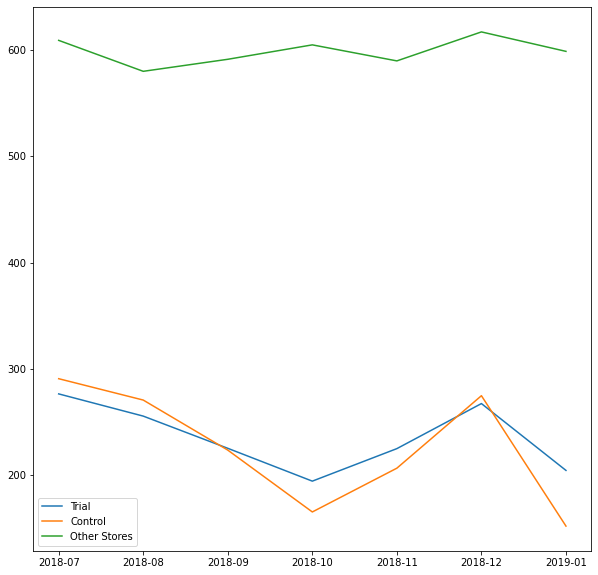

In [29]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
x=pretrial_sales_stores_final.index.astype('str')
y1=pretrial_sales_stores_final['77']
y2=pretrial_sales_stores_final['233']
y3=otherstores['avg_total_sales']
ax.plot(x,y1,label='Trial')
#ax2 = ax.twinx()
ax.plot(x,y2,label='Control')
ax.plot(x,y3,label='Other Stores')
ax.legend()

In [30]:
#preparing final dataset for hypothesis testing
data_hypo=data_cleaned[['TOT_SALES','STORE_NBR','yearmonth']]
data_hypo=data_hypo.groupby(['STORE_NBR','yearmonth'])['TOT_SALES'].sum().reset_index() 

In [31]:
data_hypo=data_hypo[data_hypo['STORE_NBR'].isin(['77','233'])] #trial & control stores only
data_hypo.head()

,STORE_NBR,yearmonth,TOT_SALES
1747,233,2018-07,290.7
1748,233,2018-08,270.6
1749,233,2018-09,223.5
1750,233,2018-10,165.3
1751,233,2018-11,206.5


In [32]:
data_hypo=data_hypo.pivot(index='yearmonth',columns='STORE_NBR',values='TOT_SALES')
data_hypo.head()

STORE_NBR,233,77
yearmonth,,
2018-07,290.7,276.4
2018-08,270.6,255.5
2018-09,223.5,225.2
2018-10,165.3,194.3
2018-11,206.5,224.9


In [33]:
#Scaling control store sales in the pretrial period to match trial store sales to ensure the trial period's
#percentage difference between both stores is accurate
data_hypo_scaling=data_hypo.reset_index()
scaling_factor_period=data_hypo_scaling[data_hypo_scaling['yearmonth']<'2019-02']
scaling_factor=sum(scaling_factor_period['77'].values)/sum(scaling_factor_period['233'].values)
scaling_factor



1.0408640181898567

**Our hypothesis testing would be a t test where:
null hypthosesis states that there's no percentage difference between trial and control stores sales percentage difference in pretrial and trial period
alternative hypothesis states that there's a difference between trial and control stores sales percentage difference in pretrial and trial period**

In [34]:
data_hypo['scaled_233']=data_hypo['233']*scaling_factor
data_hypo['per_diff_scaled']=abs((data_hypo['scaled_233']-data_hypo['77'])/data_hypo['scaled_233'])
data_hypo

STORE_NBR,233,77,scaled_233,per_diff_scaled
yearmonth,,,,
2018-07,290.7,276.4,302.579170,0.086520
2018-08,270.6,255.5,281.657803,0.092871
2018-09,223.5,225.2,232.633108,0.031952
2018-10,165.3,194.3,172.054822,0.129291
2018-11,206.5,224.9,214.938420,0.046346
2018-12,274.7,267.3,285.925346,0.065141
2019-01,152.0,204.4,158.211331,0.291943
2019-02,228.7,224.8,238.045601,0.055643
2019-03,194.0,258.1,201.927620,0.278181


In [35]:
# standard deviation is calculated based on pretrial period since null hypothesis states that there's 
#no difference between pretrial and trial period
std=st.stdev(data_hypo[:7]['per_diff_scaled'])
std
np.std(data_hypo['233'][:7])

50.841052831950925

In [36]:
data_hypo['t_statistic']=data_hypo['per_diff_scaled']/std
data_hypo

STORE_NBR,233,77,scaled_233,per_diff_scaled,t_statistic
yearmonth,,,,,
2018-07,290.7,276.4,302.579170,0.086520,0.984076
2018-08,270.6,255.5,281.657803,0.092871,1.056310
2018-09,223.5,225.2,232.633108,0.031952,0.363422
2018-10,165.3,194.3,172.054822,0.129291,1.470554
2018-11,206.5,224.9,214.938420,0.046346,0.527140
2018-12,274.7,267.3,285.925346,0.065141,0.740907
2019-01,152.0,204.4,158.211331,0.291943,3.320549
2019-02,228.7,224.8,238.045601,0.055643,0.632883
2019-03,194.0,258.1,201.927620,0.278181,3.164019


In [37]:
#degree of freedom = 7(number of pretrial months)-1 = 6
print('t_critical_values based on 95% confidence: {0}'.format(s.t.ppf(q=0.95,df=6)))

t_critical_values based on 95% confidence: 1.9431802803927816


## Since t_statistic for march and april 2019 is > t_critical,therefore we can conclude that the trial was successeful for those two month and there was a statistically significant increase in sales but not for february 2019 which has a t_statistic value less than the critical value

### We can finally say that we can reject the null hypothesis for 2 of 3 month in the trial period


**Visually checking**

In [38]:
moe=(1.94*np.std(data_hypo['233']))/np.sqrt(12) #margin of error
data_hypo['5%']=data_hypo['233']-moe
data_hypo['95%']=data_hypo['233']+moe
data_hypo

STORE_NBR,233,77,scaled_233,per_diff_scaled,t_statistic,5%,95%
yearmonth,,,,,,,
2018-07,290.7,276.4,302.579170,0.086520,0.984076,260.857608,320.542392
2018-08,270.6,255.5,281.657803,0.092871,1.056310,240.757608,300.442392
2018-09,223.5,225.2,232.633108,0.031952,0.363422,193.657608,253.342392
2018-10,165.3,194.3,172.054822,0.129291,1.470554,135.457608,195.142392
2018-11,206.5,224.9,214.938420,0.046346,0.527140,176.657608,236.342392
2018-12,274.7,267.3,285.925346,0.065141,0.740907,244.857608,304.542392
2019-01,152.0,204.4,158.211331,0.291943,3.320549,122.157608,181.842392
2019-02,228.7,224.8,238.045601,0.055643,0.632883,198.857608,258.542392
2019-03,194.0,258.1,201.927620,0.278181,3.164019,164.157608,223.842392


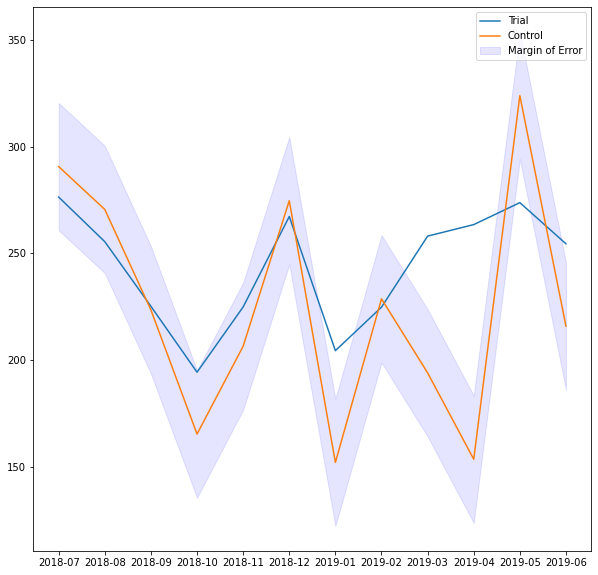

In [39]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
x=data_hypo.index.astype('str')
y1=data_hypo['77']
y2=data_hypo['233']
ax.plot(x,y1,label='Trial')
ax.plot(x,y2,label='Control')
ax.fill_between(x, (y2-moe), (y2+moe), color='b', alpha=.1,label='Margin of Error')
ax.legend()

## Since t_statistic for march and april 2019 is > t_critical,therefore we can conclude that the trial was successeful for those two month and there was a statistically significant increase in sales but not for february 2019 which has a t_statistic value less than the critical value

### We can finally say that we can reject the null hypothesis for 2 of 3 month in the trial period

## Testing for number of customers
#### Note: This would be mainly repeated steps so no explanations are provided

In [40]:
customers_num_stores=pretrial_dataset[['STORE_NBR','LYLTY_CARD_NBR','yearmonth']]
customers_num_stores_final=customers_num_stores.groupby(by=['STORE_NBR','yearmonth'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers_num_stores_final=customers_num_stores_final.pivot(index='yearmonth',values='LYLTY_CARD_NBR',columns='STORE_NBR')

In [41]:
for i in (customers_num_stores_final.columns):
    print (customers_num_stores_final[i])

yearmonth
2018-07    48
2018-08    42
2018-09    58
2018-10    44
2018-11    45
2018-12    40
2019-01    35
Freq: M, Name: 1, dtype: int64
yearmonth
2018-07     98
2018-08     95
2018-09    109
2018-10     90
2018-11     96
2018-12    108
2019-01    100
Freq: M, Name: 10, dtype: int64
yearmonth
2018-07    113
2018-08    107
2018-09    104
2018-10    105
2018-11     87
2018-12    108
2019-01    108
Freq: M, Name: 100, dtype: int64
yearmonth
2018-07     98
2018-08    102
2018-09     92
2018-10    101
2018-11     96
2018-12     88
2019-01     94
Freq: M, Name: 101, dtype: int64
yearmonth
2018-07     89
2018-08    101
2018-09    104
2018-10    100
2018-11     94
2018-12     98
2019-01    105
Freq: M, Name: 102, dtype: int64
yearmonth
2018-07    37
2018-08    42
2018-09    46
2018-10    39
2018-11    61
2018-12    49
2019-01    48
Freq: M, Name: 103, dtype: int64
yearmonth
2018-07     96
2018-08    102
2018-09     92
2018-10     98
2018-11     78
2018-12    101
2019-01     93
Freq: M, Name:

Freq: M, Name: 70, dtype: int64
yearmonth
2018-07    112
2018-08    106
2018-09     98
2018-10    100
2018-11     97
2018-12    106
2019-01    101
Freq: M, Name: 71, dtype: int64
yearmonth
2018-07    113
2018-08    116
2018-09    109
2018-10    112
2018-11     99
2018-12    109
2019-01    104
Freq: M, Name: 72, dtype: int64
yearmonth
2018-07    51
2018-08    45
2018-09    41
2018-10    53
2018-11    39
2018-12    45
2019-01    48
Freq: M, Name: 73, dtype: int64
yearmonth
2018-07    41
2018-08    29
2018-09    38
2018-10    43
2018-11    33
2018-12    41
2019-01    38
Freq: M, Name: 74, dtype: int64
yearmonth
2018-07     95
2018-08    105
2018-09    100
2018-10    116
2018-11    104
2018-12     95
2019-01    105
Freq: M, Name: 75, dtype: int64
yearmonth
2018-07    49
2018-08    47
2018-09    42
2018-10    36
2018-11    39
2018-12    46
2019-01    35
Freq: M, Name: 77, dtype: int64
yearmonth
2018-07    89
2018-08    89
2018-09    99
2018-10    96
2018-11    89
2018-12    78
2019-01    88

In [42]:
def corr_num (trial_store,ctrl_stores):
    corr_l=pd.Series()
    for i in ctrl_stores:
        store=customers_num_stores_final[i]
        x =trial_store.corr(store)
        corr_l[i]=x
    return (corr_l)

In [43]:
def mean_ae_num (trial_store,ctrl_stores):
    """" A function for getting mean absolute error between trial store and possible control stores"""
    corr_n=pd.Series()
    for i in ctrl_stores:
        store=customers_num_stores_final[i]
        error=mae(trial_store,store)
        corr_n[i]=error
    return (corr_n)

In [44]:
correlated_stores_customers=corr_num(customers_num_stores_final['77'],customers_num_stores_final.columns)
correlated_stores_customers.sort_values(ascending=False)


<ipython-input-42-b38d5ca8dfa8>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_l=pd.Series()


77     1.000000e+00
233    9.893647e-01
254    9.716952e-01
119    9.413882e-01
113    8.893396e-01
41     8.516705e-01
84     8.199417e-01
248    8.149302e-01
27     7.961806e-01
3      7.953044e-01
35     7.881614e-01
162    7.859001e-01
71     7.850105e-01
33     7.450883e-01
50     7.316873e-01
237    7.277451e-01
88     7.122694e-01
105    6.975257e-01
250    6.850514e-01
115    6.823115e-01
167    6.802644e-01
17     6.705566e-01
157    6.647438e-01
230    6.434523e-01
57     6.230127e-01
121    6.153186e-01
53     6.135868e-01
81     5.794614e-01
72     5.750600e-01
234    5.703117e-01
37     5.684173e-01
236    5.615977e-01
69     5.429009e-01
111    5.379006e-01
26     5.181753e-01
40     5.022012e-01
145    4.830180e-01
178    4.815025e-01
83     4.743240e-01
96     4.700258e-01
204    4.698428e-01
195    4.693707e-01
164    4.683361e-01
14     4.683049e-01
46     4.667882e-01
60     4.641665e-01
264    4.630682e-01
128    4.629347e-01
63     4.555213e-01
62     4.520082e-01


In [45]:
mae_stores_customers=mean_ae(pretrial_sales_stores_final['77'],pretrial_sales_stores_final.columns)

<ipython-input-24-a65c322d21af>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ctrl_stores_mae=pd.Series()


In [46]:
possible_ctrl_stores_customers=pd.DataFrame({'mas':mae_stores_customers,'corr':correlated_stores_customers})
possible_ctrl_stores_customers.sort_values(by='mas')

,mas,corr
77,0.000000,1.000000e+00
233,19.757143,9.893647e-01
188,24.214286,1.791625e-01
205,30.957143,2.017144e-01
50,31.071429,7.316873e-01
255,31.485714,-4.971273e-01
131,31.585714,6.561365e-02
214,33.714286,2.151671e-01
53,33.928571,6.135868e-01
46,34.642857,4.667882e-01


In [47]:
means_num=[]
otherstores_num=customers_num_stores_final.drop(columns=['77','233'],axis=1)
for index,row in otherstores_num.iterrows():
    means_num.append(np.mean(row))
otherstores_num['avg_num_customers']=means_num
otherstores_num

STORE_NBR,1,10,100,101,102,103,104,105,106,107,...,90,91,93,94,95,96,97,98,99,avg_num_customers
yearmonth,,,,,,,,,,,,,,,,,,,,,
2018-07,48,98,113,98,89,37,96,96,110,90,...,39,83,109,105,97,41,87,32,5,70.275194
2018-08,42,95,107,102,101,42,102,112,100,98,...,38,86,110,117,117,35,114,25,3,69.841085
2018-09,58,109,104,92,104,46,92,101,118,86,...,26,94,127,106,102,37,92,31,7,68.116279
2018-10,44,90,105,101,100,39,98,96,99,89,...,53,81,112,106,111,30,103,38,5,69.403101
2018-11,45,96,87,96,94,61,78,91,111,90,...,35,93,99,103,107,38,98,29,4,68.430233
2018-12,40,108,108,88,98,49,101,106,96,86,...,43,84,125,101,105,49,103,41,1,71.174419
2019-01,35,100,108,94,105,48,93,86,100,100,...,50,84,102,105,102,39,97,29,4,69.131783


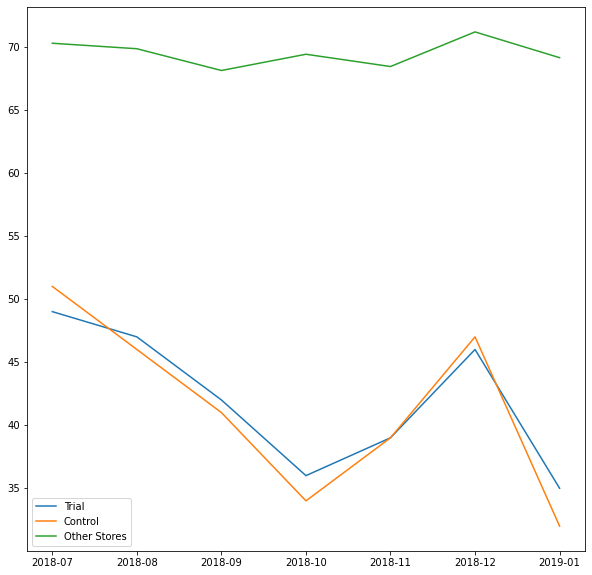

In [48]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
x=pretrial_sales_stores_final.index.astype('str')
y1=customers_num_stores_final['77']
y2=customers_num_stores_final['233']
y3=otherstores_num['avg_num_customers']
ax.plot(x,y1,label='Trial')
#ax2 = ax.twinx()
ax.plot(x,y2,label='Control')
ax.plot(x,y3,label='Other Stores')
ax.legend()

In [49]:
#preparing final dataset for hypothesis testing
data_hypo_customers=data_cleaned[['yearmonth','LYLTY_CARD_NBR','STORE_NBR']]
data_hypo_customers=data_hypo_customers.groupby(['STORE_NBR','yearmonth'])['LYLTY_CARD_NBR'].nunique().reset_index() 

In [50]:
data_hypo_customers=data_hypo_customers[data_hypo_customers['STORE_NBR'].isin(['77','233'])] #trial & control stores only
data_hypo_customers.head()

,STORE_NBR,yearmonth,LYLTY_CARD_NBR
1747,233,2018-07,51
1748,233,2018-08,46
1749,233,2018-09,41
1750,233,2018-10,34
1751,233,2018-11,39


In [51]:
data_hypo_customers=data_hypo_customers.pivot(index='yearmonth',columns='STORE_NBR',values='LYLTY_CARD_NBR')
data_hypo_customers.head()

STORE_NBR,233,77
yearmonth,,
2018-07,51,49
2018-08,46,47
2018-09,41,42
2018-10,34,36
2018-11,39,39


In [52]:
data_hypo_scaling=data_hypo_customers.reset_index()
scaling_factor_period2=data_hypo_scaling[data_hypo_scaling['yearmonth']<'2019-02']
scaling_factor2=sum(scaling_factor_period2['77'].values)/sum(scaling_factor_period2['233'].values)
scaling_factor2

1.013793103448276

In [53]:
data_hypo_customers['scaled_233']=data_hypo_customers['233']*scaling_factor2
data_hypo_customers['per_diff_scaled']=abs((data_hypo_customers['scaled_233']-data_hypo_customers['77'])/data_hypo_customers['scaled_233'])
data_hypo_customers

STORE_NBR,233,77,scaled_233,per_diff_scaled
yearmonth,,,,
2018-07,51,49,51.703448,0.052288
2018-08,46,47,46.634483,0.007838
2018-09,41,42,41.565517,0.010453
2018-10,34,36,34.468966,0.044418
2018-11,39,39,39.537931,0.013605
2018-12,47,46,47.648276,0.034593
2019-01,32,35,32.441379,0.078869
2019-02,43,44,43.593103,0.009334
2019-03,39,47,39.537931,0.188732


In [54]:
std2=st.stdev(data_hypo_customers[:7]['per_diff_scaled'])
std2

0.02616946382885311

In [55]:
data_hypo_customers['t_statistic']=data_hypo_customers['per_diff_scaled']/std2
data_hypo_customers

STORE_NBR,233,77,scaled_233,per_diff_scaled,t_statistic
yearmonth,,,,,
2018-07,51,49,51.703448,0.052288,1.998038
2018-08,46,47,46.634483,0.007838,0.299506
2018-09,41,42,41.565517,0.010453,0.399434
2018-10,34,36,34.468966,0.044418,1.697313
2018-11,39,39,39.537931,0.013605,0.519898
2018-12,47,46,47.648276,0.034593,1.321867
2019-01,32,35,32.441379,0.078869,3.013782
2019-02,43,44,43.593103,0.009334,0.356674
2019-03,39,47,39.537931,0.188732,7.211913


In [56]:
stdnofcustomers=st.stdev(data_hypo_customers['233']) #std_deviation
moe_customers=(1.94*stdnofcustomers)/np.sqrt(12) #margin of error

In [57]:
data_hypo_customers['5%']=data_hypo_customers['233']-moe_customers
data_hypo_customers['95%']=data_hypo_customers['233']+moe_customers
data_hypo_customers

STORE_NBR,233,77,scaled_233,per_diff_scaled,t_statistic,5%,95%
yearmonth,,,,,,,
2018-07,51,49,51.703448,0.052288,1.998038,46.71937,55.28063
2018-08,46,47,46.634483,0.007838,0.299506,41.71937,50.28063
2018-09,41,42,41.565517,0.010453,0.399434,36.71937,45.28063
2018-10,34,36,34.468966,0.044418,1.697313,29.71937,38.28063
2018-11,39,39,39.537931,0.013605,0.519898,34.71937,43.28063
2018-12,47,46,47.648276,0.034593,1.321867,42.71937,51.28063
2019-01,32,35,32.441379,0.078869,3.013782,27.71937,36.28063
2019-02,43,44,43.593103,0.009334,0.356674,38.71937,47.28063
2019-03,39,47,39.537931,0.188732,7.211913,34.71937,43.28063


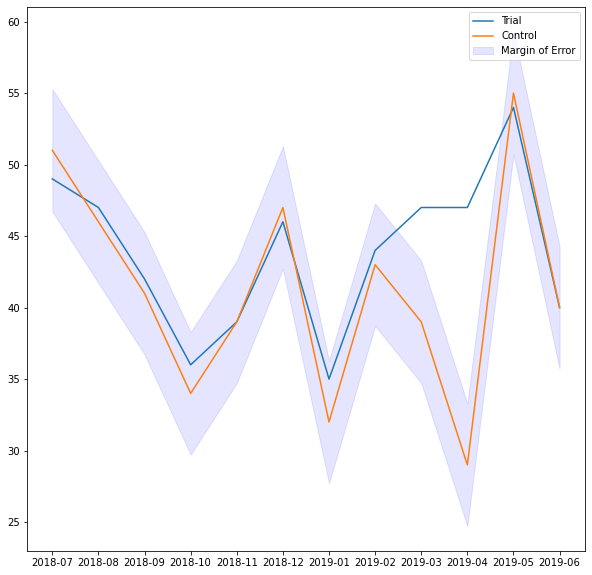

In [58]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
x=data_hypo_customers.index.astype('str')
y1=data_hypo_customers['77']
y2=data_hypo_customers['233']
ax.plot(x,y1,label='Trial')
ax.plot(x,y2,label='Control')
ax.fill_between(x, (y2-moe_customers), (y2+moe_customers), color='b', alpha=.1,label='Margin of Error')
ax.legend()